In [3]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [ ]:
ad =pd.read_csv(r"C:\Users\Amol purkar\Desktop\Imarticus\Python\adultKNN1.csv")

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
ad[ad.select_dtypes(include=["object"]).columns]=ad[ad.select_dtypes(include=["object"]).columns].apply(le.fit_transform)

In [ ]:
from sklearn.model_selection import train_test_split
ad_train,ad_test=train_test_split(ad,test_size=0.2)

#df1=ad_train[ed_train.income==1]

#ed_train= pd.concat([ed_train,df1,df1])


In [ ]:
ad_train_x=ad_train.iloc[:,0:-1]
ad_train_y=ad_train.iloc[:,-1]

In [4]:
ad_test_x=ad_test.iloc[:,0:-1]
ad_test_y=ad_test.iloc[:,-1]

In [10]:
from sklearn.linear_model import LogisticRegression
log_ad= LogisticRegression()

In [11]:
log_ad.fit(ad_train_x,ad_train_y)

LogisticRegression()

In [12]:
pred =log_ad.predict(ad_test_x)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
from sklearn.metrics import confusion_matrix
tab_ad =confusion_matrix(ad_test_y,pred)
tab_ad

array([[6954,  428],
       [1695,  692]], dtype=int64)

In [14]:
tab_ad.diagonal().sum()*100/tab_ad.sum()

78.2679905824547

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(ad_test_y,pred)*100

In [ ]:
from sklearn.metrics import precision_score

precision_score(ad_test_y,pred)

In [ ]:
from sklearn.metrics import recall_score

recall_score(ad_test_y,pred)

In [ ]:
from sklearn.metrics import f1_score

f1_score(ad_test_y,pred)

In [ ]:
pred_prob =log_ad.predict_proba(ad_test_x)
pred_prob

In [ ]:
roc_auc_score(ad_test_y,pred)

a,b,c=roc_curve(ad_test_y,pred_prob[:,1])

Text(0.5, 0.5, 'AUROC is 0.5119 ')

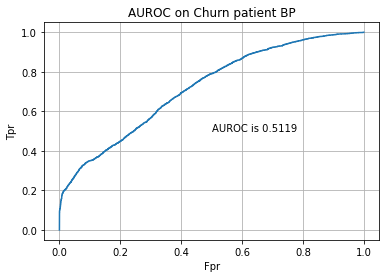

In [17]:

plt.plot(a,b)
plt.xlabel("Fpr")
plt.ylabel("Tpr")
plt.title("AUROC on Churn patient BP")
plt.grid()
plt.text(x= .5,y=.5 ,s="AUROC is 0.5119 ")